<a href="https://colab.research.google.com/github/ankitsharma38/Machine_Learning_LABS/blob/main/Practical_7_to_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`Practical 7:Implement a linear regression and multi linear regression algorithm with regularization using sample dataset.`**

Linear Regression MSE: 0.8728486123745253
Lasso Regression MSE: 0.9994093331124514
Ridge Regression MSE: 0.8728281798662696
Lasso Regression for multi-linear MSE: 1.2613417783211622
Ridge Regression for multi-linear MSE: 0.9254783866532336


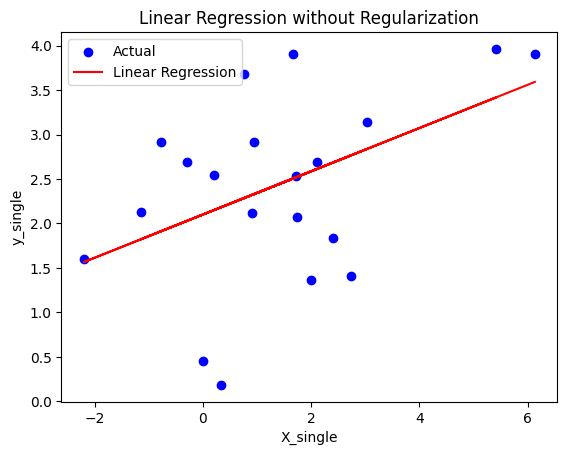

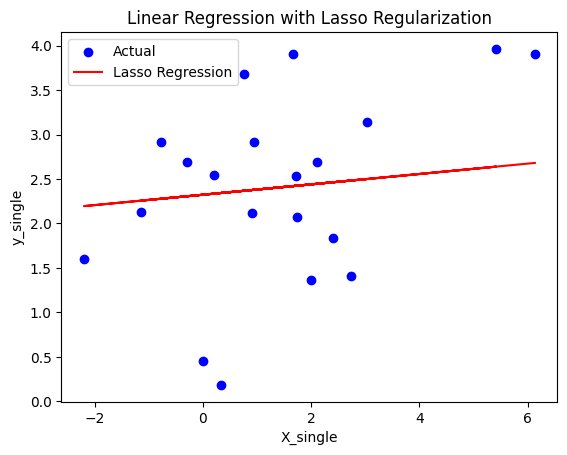

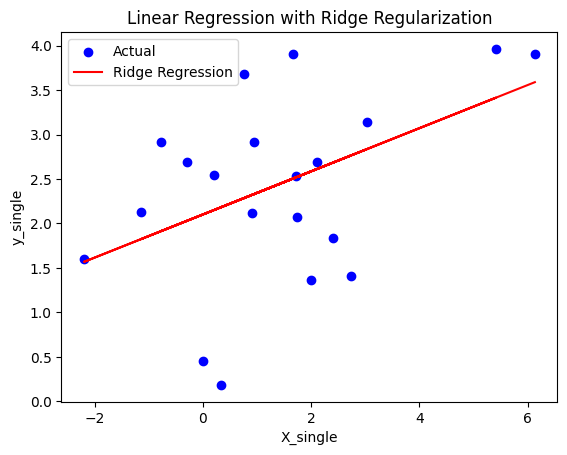

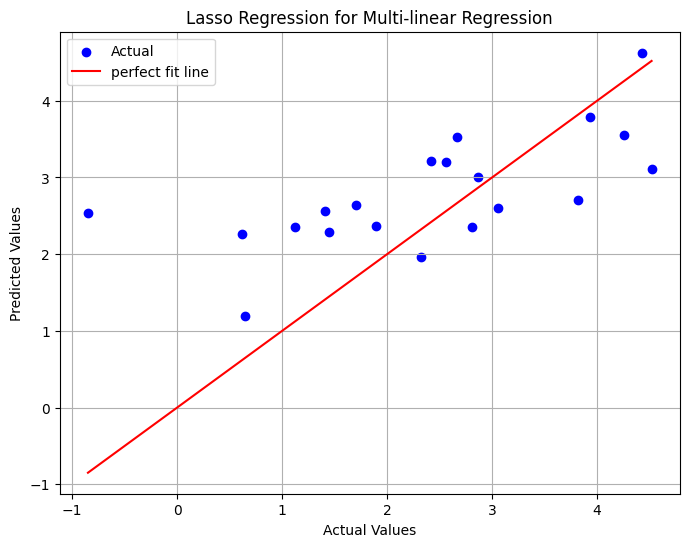

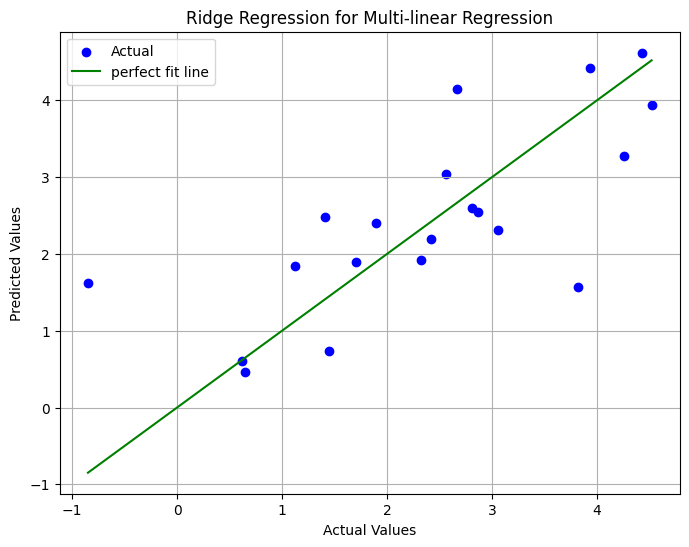

[1.00000000e-03 1.29154967e-02 1.66810054e-01 2.15443469e+00
 2.78255940e+01 3.59381366e+02 4.64158883e+03 5.99484250e+04
 7.74263683e+05 1.00000000e+07]


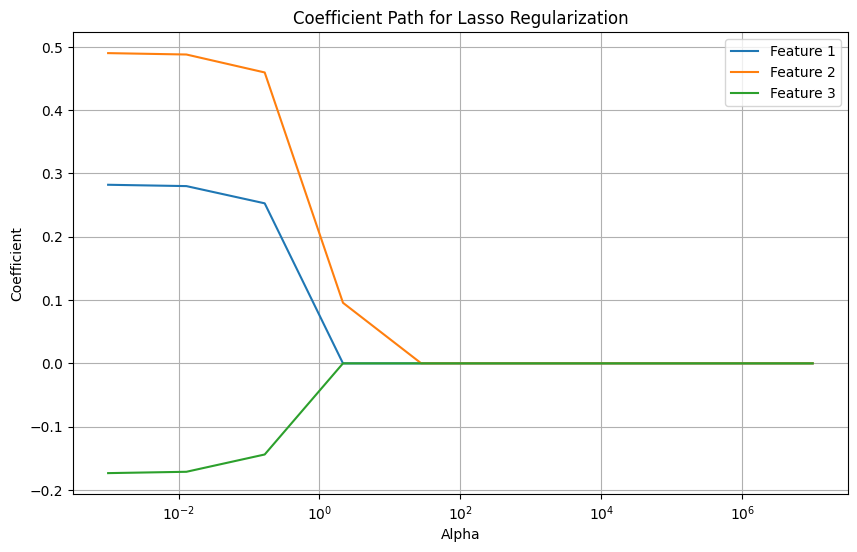

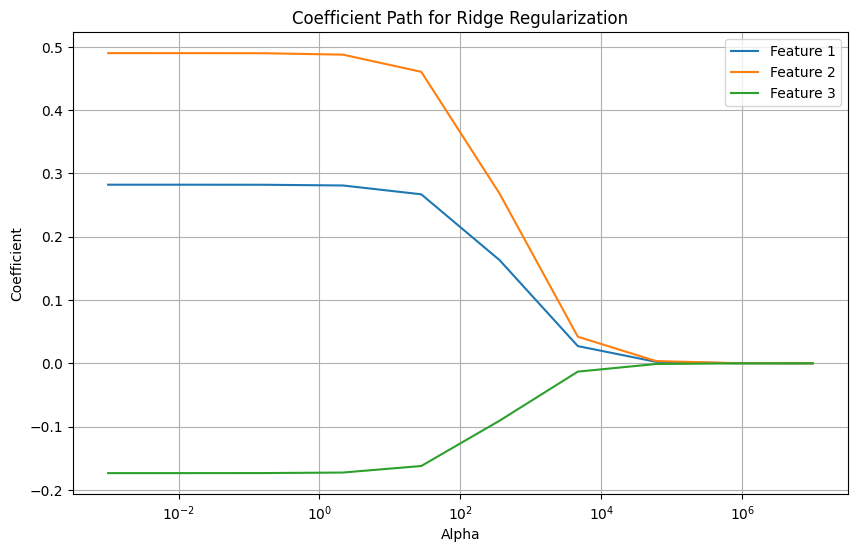

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

np.random.seed(42)
X_single=2.5*np.random.randn(100)+1.5
y_single = 2+ 0.3*X_single+np.random.randn(100)

#Features and target vector for multi-linear
X_multi=2.5*np.random.randn(100,3)+1.5
y_multi = 2+ 0.3*X_multi[:,0]+ 0.5*X_multi[:,1]-0.2*X_multi[:,2]+ np.random.randn(100)

X_single_train, X_single_test, y_single_train, y_single_test = train_test_split(X_single, y_single, test_size=0.2, random_state=42)

#Reshape the Single parameter of the model
X_single_train=X_single_train.reshape(-1,1)
X_single_test=X_single_test.reshape(-1,1)

X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

#model selection and train the single model
model_single=LinearRegression()
model_single.fit(X_single_train, y_single_train)

model_single1=Lasso()
model_single1.fit(X_single_train, y_single_train)

model_single2=Ridge()
model_single2.fit(X_single_train, y_single_train)

y_single_predict=model_single.predict(X_single_test)
y_single_predict1=model_single1.predict(X_single_test)
y_single_predict2=model_single2.predict(X_single_test)

linear_mse=mean_squared_error(y_single_test, y_single_predict)
lasso_mse=mean_squared_error(y_single_test, y_single_predict1)
ridge_mse=mean_squared_error(y_single_test, y_single_predict2)

print(f"Linear Regression MSE: {linear_mse}")
print(f"Lasso Regression MSE: {lasso_mse}")
print(f"Ridge Regression MSE: {ridge_mse}")


#calculation for multi-linearmodel using Lasso and Ridge alpha as regularizatio parameter

lasso_model=Lasso(alpha=1.0)
lasso_model.fit(X_multi_train, y_multi_train)
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(X_multi_train, y_multi_train)

y_multi_predict_lasso=lasso_model.predict(X_multi_test)
y_multi_predict_ridge=ridge_model.predict(X_multi_test)

lasso_mse_multi=mean_squared_error(y_multi_test, y_multi_predict_lasso)
ridge_mse_multi=mean_squared_error(y_multi_test, y_multi_predict_ridge)

print(f"Lasso Regression for multi-linear MSE: {lasso_mse_multi}")
print(f"Ridge Regression for multi-linear MSE: {ridge_mse_multi}")

#plot result for single linear regression without regularization
plt.scatter(X_single_test, y_single_test, color='blue', label='Actual')
plt.plot(X_single_test, y_single_predict, color='red', label='Linear Regression')
plt.xlabel('X_single')
plt.ylabel('y_single')
plt.title('Linear Regression without Regularization')
plt.legend()
plt.show()

#plot result for single linear regression using Lasso Regularization
plt.scatter(X_single_test, y_single_test, color='blue', label='Actual')
plt.plot(X_single_test, y_single_predict1, color='red', label='Lasso Regression')
plt.xlabel('X_single')
plt.ylabel('y_single')
plt.title('Linear Regression with Lasso Regularization')
plt.legend()
plt.show()

#plot result for single linear regression using Ridge Regularization
plt.scatter(X_single_test, y_single_test, color='blue', label='Actual')
plt.plot(X_single_test, y_single_predict2, color='red', label='Ridge Regression')
plt.xlabel('X_single')
plt.ylabel('y_single')
plt.title('Linear Regression with Ridge Regularization')
plt.legend()
plt.show()


#plot lasso regression for multi-linear regression
plt.figure(figsize=(8,6))
plt.scatter(y_multi_test, y_multi_predict_lasso, color='blue', label='Actual')
plt.plot([min(y_multi_test), max(y_multi_test)], [min(y_multi_test), max(y_multi_test)], color='red', label='perfect fit line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression for Multi-linear Regression')
plt.legend()
plt.grid(True)
plt.show()

#plot ridge regression for multi-linear regression
plt.figure(figsize=(8,6))
plt.scatter(y_multi_test, y_multi_predict_ridge, color='blue', label='Actual')
plt.plot([min(y_multi_test), max(y_multi_test)], [min(y_multi_test), max(y_multi_test)], color='green', label='perfect fit line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression for Multi-linear Regression')
plt.legend()
plt.grid(True)
plt.show()

#values for alpha for regularization
alphas=np.logspace(-3,7,10)
print(alphas)

#store coefficient for lasso and ridge
lasso_coefs=[]
ridge_coefs=[]

#train lasso and ridge model for different alpha values
for alpha in alphas:
  lasso_model=Lasso(alpha=alpha)
  lasso_model.fit(X_multi_train, y_multi_train)
  ridge_model=Ridge(alpha=alpha)
  ridge_model.fit(X_multi_train, y_multi_train)
  lasso_coefs.append(lasso_model.coef_)
  ridge_coefs.append(ridge_model.coef_)

#Convert values to array for plotting
lasso_coefs=np.array(lasso_coefs)
ridge_coefs=np.array(ridge_coefs)

#plot the coefficient path lasso regularization model
plt.figure(figsize=(10,6))
plt.plot(alphas, lasso_coefs)
plt.xlabel('Alpha')
plt.ylabel('Coefficient')
plt.title('Coefficient Path for Lasso Regularization')
plt.legend(['Feature 1', 'Feature 2', 'Feature 3'])
plt.xscale('log')
plt.grid(True)
plt.show()

#plot the coefficient path ridge regularization
plt.figure(figsize=(10,6))
plt.plot(alphas, ridge_coefs)
plt.xlabel('Alpha')
plt.ylabel('Coefficient')
plt.title('Coefficient Path for Ridge Regularization')
plt.legend(['Feature 1', 'Feature 2', 'Feature 3'])
plt.xscale('log')
plt.grid(True)
plt.show()

***Practical_8 :- Perform hyper parameter tuning using sample dataset.		***

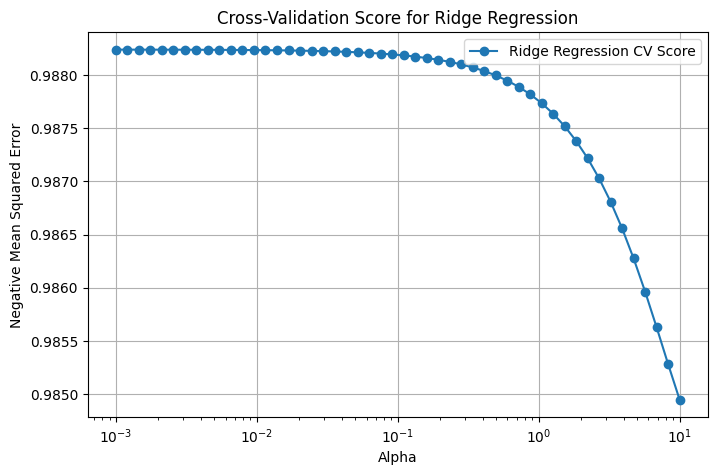

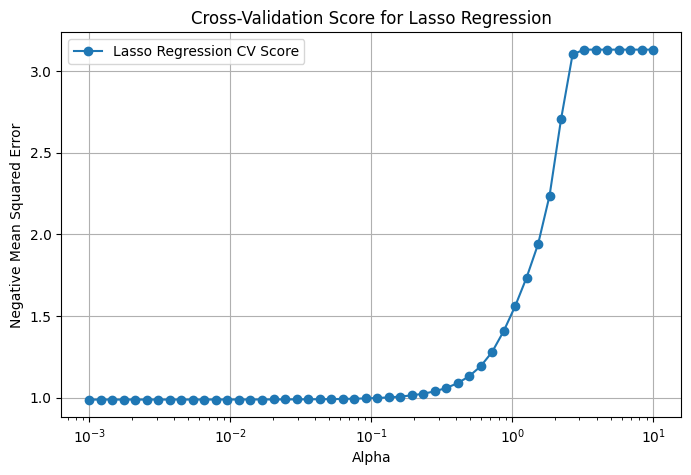

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X_multi = 2.5 * np.random.randn(100, 3) + 1.5
y_multi = 2 + 0.3 * X_multi[:, 0] + 0.5 * X_multi[:, 1] - 0.2 * X_multi[:, 2] + np.random.randn(100)

# Split into training and testing sets
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Define alpha values
alpha = np.logspace(-3, 1, 50)

# Store cross-validation scores
ridge_cv_scores = []
lasso_cv_scores = []

for a in alpha:
    # Ridge Regression
    ridge_model = Ridge(alpha=a)
    ridge_cv_score = cross_val_score(ridge_model, X_multi_train, y_multi_train, cv=5, scoring='neg_mean_squared_error')
    ridge_cv_scores.append(np.mean(ridge_cv_score))

    # Lasso Regression
    lasso_model = Lasso(alpha=a)
    lasso_cv_score = cross_val_score(lasso_model, X_multi_train, y_multi_train, cv=5, scoring='neg_mean_squared_error')
    lasso_cv_scores.append(np.mean(lasso_cv_score))

# Convert lists to NumPy arrays
ridge_cv_scores = np.array(ridge_cv_scores)
lasso_cv_scores = np.array(lasso_cv_scores)

# Plot Ridge Regression CV Scores
plt.figure(figsize=(8, 5))
plt.plot(alpha, -ridge_cv_scores, marker='o', label='Ridge Regression CV Score')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.title('Cross-Validation Score for Ridge Regression')
plt.xscale("log")  # Log scale for better visualization
plt.legend()
plt.grid(True)
plt.show()

# Plot Lasso Regression CV Scores
plt.figure(figsize=(8, 5))
plt.plot(alpha, -lasso_cv_scores, marker='o', label='Lasso Regression CV Score')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.title('Cross-Validation Score for Lasso Regression')
plt.xscale("log")
plt.legend()
plt.grid(True)
plt.show()

**Practical 9: Using sample data implement the evaluation parameters of regression techniques.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

np.random.seed(0)
X=2*np.random.rand(100,1)
y=4+3*X+np.random.rand(100,1)

data = pd.DataFrame(np.hstack((X,y)),columns=['X','y'])
print(data)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rmse)
print("R-squared:",r2)

           X         y
0   1.097627  7.970698
1   1.430379  8.561144
2   1.205527  8.351774
3   1.089766  8.231488
4   0.847310  6.790682
..       ...       ...
95  0.366383  5.589607
96  1.173026  7.746492
97  0.040215  4.375002
98  1.657880  9.031669
99  0.009391  4.462589

[100 rows x 2 columns]
Mean Squared Error: 0.06606897290334093
Mean Absolute Error: 0.21851184156952774
Root Mean Squared Error: 0.2570388548514425
R-squared: 0.9662264304054232


**Practical 10 :- Implement k-means clustering using a dataset.**

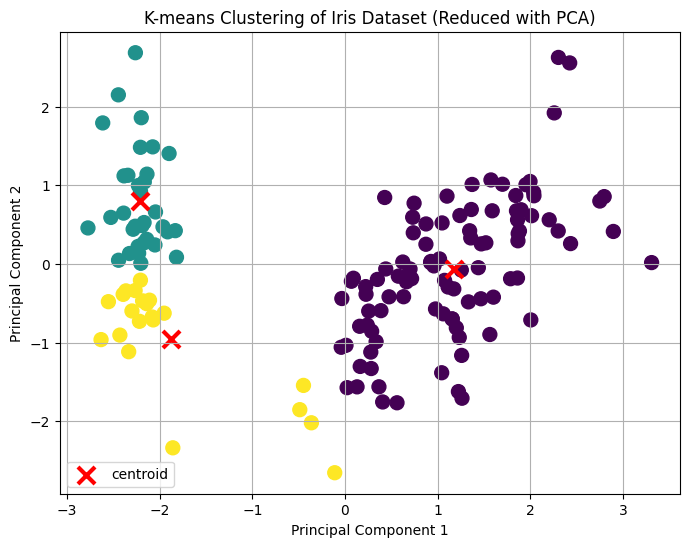

Cluster centers:
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]
Cluster labels:
[1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis',marker='o',s=100)
plt.scatter(pca.transform(centroids)[:, 0], pca.transform(centroids)[:, 1], marker='x', s=150, linewidths=3, color='red', label="centroid")
plt.title('K-means Clustering of Iris Dataset (Reduced with PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


print(f"Cluster centers:\n{centroids}")
print(f"Cluster labels:\n{cluster_labels}")

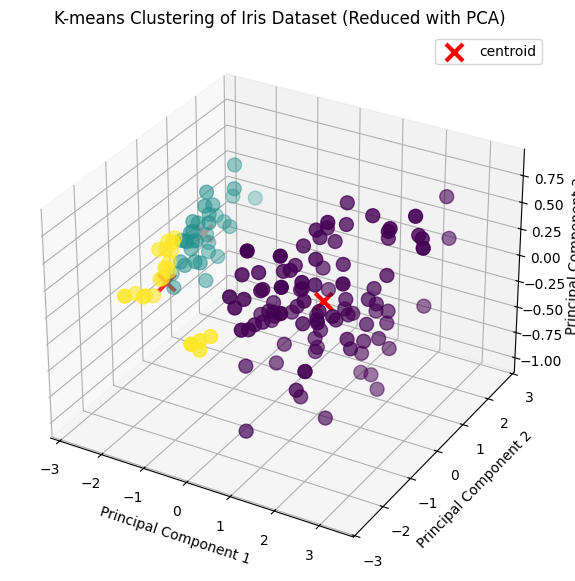

Cluster centers:
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]
Cluster labels:
[1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cluster_labels, cmap='viridis', marker='o', s=100)
ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2], marker='x', s=150, linewidths=3, color='red', label="centroid")
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('K-means Clustering of Iris Dataset (Reduced with PCA)')
plt.legend()
plt.grid(True)
plt.show()





print(f"Cluster centers:\n{centroids}")
print(f"Cluster labels:\n{cluster_labels}")